# **AI Libraries in Python**

In this module we are going to explore some of the more commonly advocated python libraries for Artifical Intelligence and Machine Learning. 

To help us through this exercise we are going to use the historic stock price for [SingTel (Z74.SI)](https://en.wikipedia.org/wiki/Singtel). The stock prices can be downloaded from [Yahoo Finance](https://sg.finance.yahoo.com/quote/Z74.SI/history?p=Z74.SI)


## Importing Libraries

Libraries are a collection of shared files (or modules) that contain functions for use by multiples programs. These allow for common functionality to be written once and repurposed as required. 

The Python [standard library](https://docs.python.org/3/library/) contains an extensive suite of modules that are built into Python by default. For additional functionality libraries are available from PyPI (the Python Package Index).

In this next section we are going to import some libraries that are popularly used in setting up Exploratory Data Analytics (EDA) and Machine Learning.

In the example given below you can see that we use the `import` keyword to load the library into our program. We make use of the `as` keyword to provide a shortcut `alias` for us to refer to the library in the program. Think of it as a shorthand notation.

In [ ]:
import numpy as np  # Import numpy library (as a given short name) / Here we import the entire library (called alias)
import pandas as pd  
import matplotlib.pyplot as plt # Here we import just a single package in the library i.e. pyplot in the matplotlib
import seaborn as sns

# Using the yfinance module to download finance data; there are other options
!pip install yfinance
import yfinance as yf

from pandas_datareader import data as wb

# fastai library
!pip install fastai
from fastai.imports import *
from fastai.tabular.core import add_datepart

from sklearn.cluster import KMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


It is possible that some of the libraries that you are looking to import are not available in Google Colaboratory by default. In order to provision the library in the environment you can install the library using the following command.

`!pip install or !apt-get install.`

[reference](https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb)

## Loading Data

In this section we look at four different methods (A, B, C) of accessing/downloading the dataset required for this notebook. It is important to look for such options for your own project and not always go down the CSV upload path. 

### A. Loading the data to Google Colab

Right first up let's load the dataset that we downloaded from Yahoo Finance into our program for some initial analysis. Follow the steps given below to achieve this.

1. Let us use Google Colab to find the data.
2. Select Files tab from the menu bar on the left. You will see there are a couple of options that we make use of. These will allow you different ways in which you can make files available to your Google Colab program.
3. For the purposes of this exercise Click the first icon to upload the dataset. 
  1. The file we are using is named as **singtel_stock_market_closing_prices.csv** however you can make use of any name you choose. (It is always good to provide a descriptive name which can be used to identify the data available in the file)
  2. It is always good to organise the data in your notebook, we are going to use a folder called **data** to hold all our data files.

Note: You need to upload these datasets everytime you reconnect to the notebook. What would you do to make this more efficient?




Now the file is visible to Google Colab we are going to load it into our notebook to work on. For this we will be using one of the libraries, **Pandas** which we loaded at the beginning of the notebook. 

**Pandas** is an open-source Python Library providing high-performance data manipulation and analysis tool using its powerful data structures. The name Pandas is derived from the word Panel Data – an Econometrics term for  Multidimensional data.

You will notice that we are making use of our alias `pd` to call the pandas library.

In [ ]:
df_singtel_stock_market_closing_prices = pd.read_csv('/content/data/singtel_stock_market_closing_prices.csv')  # Load the dataset

### B. Download data from DataReader library 

In [ ]:
# will not work because Yahoo servers have blocked this library
df_singtel_stock_market_closing_prices = pd.DataFrame()
df_singtel_stock_market_closing_prices = wb.DataReader('Z74.SI', data_source='yahoo', start='2004-1-1')

RemoteDataError: ignored

### C. Download data from yfinance library

Some reference material for the yfinance library.


* [Github repository](https://aroussi.com/post/python-yahoo-finance)

* [Python Package Index](https://pypi.org/project/yfinance/)

* [Examples](https://aroussi.com/post/python-yahoo-finance)

In [ ]:
df_singtel_stock_market_closing_prices = yf.download('Z74.SI', start="2004-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_singtel_stock_market_closing_prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-11-05,2.38,2.39,2.33,2.36,1.088045,357380000
2004-11-08,2.37,2.37,2.30,2.30,1.060382,28771000
2004-11-09,2.33,2.34,2.30,2.32,1.069603,26134000
2004-11-10,2.33,2.35,2.33,2.34,1.078824,14558000
2004-11-11,2.34,2.34,2.34,2.34,1.078824,0


In [ ]:
# Reset the index column
df_singtel_stock_market_closing_prices=df_singtel_stock_market_closing_prices.reset_index()

## Working with Datasets using Pandas


As a first step we are going to get to know the contents of our dataset. Let's see what columns of data (also called attributes, features) are available in the file. We are going to `print` out the columns using the `keys` method.

In [ ]:
print(df_singtel_stock_market_closing_prices.keys())  # We print the value of the dataset.

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
df_singtel_stock_market_closing_prices.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### Pandas Methods & Attribues

Datasets are converted to dataframes when working with Pandas. The library provides methods and attributes which allow you to work with the data in the dataframe. Some of the are enumerated below; we will be making use of some of these in this notebook in order to work with our stock prices dataset.

**Dataframe methods (df.method())**

*   head( [n] ), tail( [n] ) - first/last n rows
*   describe() - 	generate descriptive statistics (for numeric columns only)
*   max(), min()	 - return max/min values for all numeric columns
*   mean(), median() - 	return mean/median values for all numeric columns
*   std() - 	standard deviation
*   sample([n])	 - returns a random sample of the data frame
*   dropna() - 	drop all the records with missing values

**Pandas dataframe attibutes (df.attribute)**  

*   dtypes	- list the types of the columns
*   columns		- list the column names
*   axes	- 	list the row labels and column names
*   ndim	- 	number of dimensions
*   size		- number of elements 
*   shape		- return a tuple representing the dimensionality 
*   values	- 	numpy representation of the data

#### .head()
Now let's have a look at a sample of our dataset by pulling up the first 5 rows of data for this we will make use of the head method provided by pandas.

In [ ]:
df_singtel_stock_market_closing_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-11-05,2.38,2.39,2.33,2.36,1.088045,357380000
1,2004-11-08,2.37,2.37,2.30,2.30,1.060382,28771000
2,2004-11-09,2.33,2.34,2.30,2.32,1.069603,26134000
3,2004-11-10,2.33,2.35,2.33,2.34,1.078824,14558000
4,2004-11-11,2.34,2.34,2.34,2.34,1.078824,0


**Exercise**
1. Read the first 10, 20, 50 records
2. View the last 5 records (Hint: Google search for "pandas read last n rows")

#### .dtypes

General data types in Pandas  

*   object (string)
*   int64 (int)
*   float64 (float)

In [ ]:
# Check for data types
df_singtel_stock_market_closing_prices.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

#### .describe()

**Basic Descriptive Statistics**  

*  describe -	Basic statistics (count, mean, std, min, quantiles, max)
*  min, max -		Minimum and maximum values
*  mean, median, mode -		Arithmetic average, median and mode
*  var, std -		Variance and standard deviation
*  sem	 -	Standard error of mean
*  skew	 -	Sample skewness
*  kurt -		kurtosis

In [ ]:
df_singtel_stock_market_closing_prices.describe() 

,Open,High,Low,Close,Adj Close,Volume
count,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4.496000e+03
mean,3.202536,3.228381,3.175574,3.202347,2.187062,2.265435e+07
std,0.547318,0.549578,0.543394,0.547207,0.584676,3.586362e+07
min,2.010000,2.040000,1.990000,2.000000,1.060382,0.000000e+00
25%,2.670000,2.690000,2.647500,2.670000,1.746998,1.336275e+07
50%,3.180000,3.200000,3.150000,3.180000,2.253566,1.962435e+07
75%,3.690000,3.710000,3.660000,3.680000,2.688845,2.706790e+07
max,4.570000,4.570000,4.470000,4.530000,3.276152,9.006150e+08


**Exercise**

1. Provide a  summary of the numeric columns in the dataset
2. Calculate standard deviation for all numeric columns;
3. What are the mean values of the first 50 records in the dataset?   (Hint: use head() method to subset the first 50 records and then calculate the mean)

**Exercise**

1. Find how many records are in this data frame?
2. How many columns?     
3. What are the column names?
4. What types of columns are in this data frame?


In [ ]:
# Check for missing values
df_singtel_stock_market_closing_prices.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Exercise**

1. Calculate the basic statistics for the *Adj Close* column (Hint: .describe())
2. Find how many values in the *Adj Close* column (Hint: use count method)
3. Calculate the average Adjusted Closing price


### Partitioning and Filtering the Data

**Filter dataframe**

In [ ]:
df_singtel_stock_market_closing_prices['Year'] = pd.DatetimeIndex(df_singtel_stock_market_closing_prices['Date']).year
df_singtel_stock_market_closing_prices['Month'] = pd.DatetimeIndex(df_singtel_stock_market_closing_prices['Date']).month

# Get prices from after 2010
df_sub = df_singtel_stock_market_closing_prices[ df_singtel_stock_market_closing_prices['Year'] > 2010 ]
df_sub.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
1554,2011-01-03,3.07,3.08,3.06,3.07,1.806757,4530000,2011,1
1555,2011-01-04,3.08,3.09,3.07,3.07,1.806757,10104000,2011,1
1556,2011-01-05,3.06,3.07,3.05,3.07,1.806757,8972000,2011,1
1557,2011-01-06,3.07,3.09,3.05,3.08,1.812642,10472000,2011,1
1558,2011-01-07,3.07,3.08,3.05,3.06,1.800872,11335000,2011,1


In [ ]:
# Get prices from after 2010 and only in August
df_sub = df_singtel_stock_market_closing_prices[ (df_singtel_stock_market_closing_prices['Year'] > 2010) & (df_singtel_stock_market_closing_prices['Month'] == 8)] # Boolean operators '&' for AND, '|' for OR
df_sub.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
1699,2011-08-01,3.37,3.40,3.36,3.40,2.000968,34819000,2011,8
1700,2011-08-02,3.40,3.41,3.38,3.38,1.989198,31500000,2011,8
1701,2011-08-03,3.37,3.39,3.31,3.32,1.953887,48008000,2011,8
1702,2011-08-04,3.33,3.36,3.31,3.32,1.953887,34263000,2011,8
1703,2011-08-05,3.10,3.13,3.05,3.06,1.856800,70125000,2011,8


**Sorting**

In [ ]:
# Create a new data frame from the original sorted by the column Adj Close column
df_sorted = df_singtel_stock_market_closing_prices.sort_values(by ='Adj Close')
df_sorted.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
1,2004-11-08,2.37,2.37,2.30,2.30,1.060382,28771000,2004,11
2,2004-11-09,2.33,2.34,2.30,2.32,1.069603,26134000,2004,11
11,2004-11-22,2.32,2.33,2.30,2.32,1.069603,22710000,2004,11
21,2004-12-06,2.39,2.39,2.33,2.33,1.074213,11085000,2004,12
10,2004-11-19,2.35,2.35,2.33,2.33,1.074213,10229000,2004,11


In [ ]:
# Create a new dataframe with only 2 columns
df_singtel_stock_market_closing_prices[['Date','Adj Close']]

,Date,Adj Close
0,2004-11-05,1.088045
1,2004-11-08,1.060382
2,2004-11-09,1.069603
3,2004-11-10,1.078824
4,2004-11-11,1.078824
...,...,...
4491,2022-09-14,2.700000
4492,2022-09-15,2.700000
4493,2022-09-16,2.700000
4494,2022-09-19,2.690000


In [ ]:
# Select only 10th to 20th rows
df_singtel_stock_market_closing_prices[10:20]

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
10,2004-11-19,2.35,2.35,2.33,2.33,1.074213,10229000,2004,11
11,2004-11-22,2.32,2.33,2.30,2.32,1.069603,22710000,2004,11
12,2004-11-23,2.34,2.38,2.33,2.38,1.097265,25368000,2004,11
13,2004-11-24,2.39,2.41,2.37,2.40,1.106486,32021000,2004,11
14,2004-11-25,2.39,2.41,2.35,2.35,1.083434,19290000,2004,11
15,2004-11-26,2.37,2.37,2.34,2.36,1.088045,5415000,2004,11
16,2004-11-29,2.36,2.37,2.34,2.36,1.088045,11100000,2004,11
17,2004-11-30,2.37,2.38,2.34,2.37,1.092655,36403000,2004,11
18,2004-12-01,2.37,2.39,2.36,2.39,1.101875,26000000,2004,12
19,2004-12-02,2.39,2.40,2.38,2.39,1.101875,13834000,2004,12


In [ ]:
# select a range of rows, using their labels we can use method loc method
df_singtel_stock_market_closing_prices.loc[10:20, ['Date','Adj Close']]

,Date,Adj Close
10,2004-11-19,1.074213
11,2004-11-22,1.069603
12,2004-11-23,1.097265
13,2004-11-24,1.106486
14,2004-11-25,1.083434
15,2004-11-26,1.088045
16,2004-11-29,1.088045
17,2004-11-30,1.092655
18,2004-12-01,1.101875
19,2004-12-02,1.101875


In [ ]:
# select a range of rows and/or columns, using their positions we can use method iloc
df_singtel_stock_market_closing_prices.iloc[10:20, [0, 2, 4]]

,Date,High,Close
10,2004-11-19,2.35,2.33
11,2004-11-22,2.33,2.32
12,2004-11-23,2.38,2.38
13,2004-11-24,2.41,2.40
14,2004-11-25,2.41,2.35
15,2004-11-26,2.37,2.36
16,2004-11-29,2.37,2.36
17,2004-11-30,2.38,2.37
18,2004-12-01,2.39,2.39
19,2004-12-02,2.40,2.39


**Exercise**

*  df.iloc[0]  # First row of a data frame
*  df.iloc[-1] # Last row 
*  df.iloc[:, 0]  # First column
*  df.iloc[:, -1] # Last column 
*  df.iloc[0:7]       #First 7 rows 
*  df.iloc[:, 0:2]    #First 2 columns
*  df.iloc[1:3, 0:2]  #Second through third rows and first 2 columns
*  df.iloc[[0,5], [1,3]]  #1st and 6th rows and 2nd and 4th columns


### Handling missing values

df.method()

*  dropna() - Drop missing observations
*  dropna(how='all')- 	Drop observations where all cells is NA
*  dropna(axis=1, how='all')- 	Drop column if all the values are missing
*  dropna(thresh = 5)- 	Drop rows that contain less than 5 non-missing values
*  fillna(0)	- Replace missing values with zeros
*  isnull()	- returns True if the value is missing
*  notnull()	- Returns True for non-missing values

In [ ]:
# Select the rows that have at least one missing value
df_singtel_stock_market_closing_prices[df_singtel_stock_market_closing_prices.isnull().any(axis=1)].head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month


In [ ]:
# Based on one of the strategies above we are going to drop any row which the "Adj Close" price is not available.
df_singtel_stock_market_closing_prices.dropna(subset = ['Adj Close'])

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2004-11-05,2.38,2.39,2.33,2.36,1.088045,357380000,2004,11
1,2004-11-08,2.37,2.37,2.30,2.30,1.060382,28771000,2004,11
2,2004-11-09,2.33,2.34,2.30,2.32,1.069603,26134000,2004,11
3,2004-11-10,2.33,2.35,2.33,2.34,1.078824,14558000,2004,11
4,2004-11-11,2.34,2.34,2.34,2.34,1.078824,0,2004,11
...,...,...,...,...,...,...,...,...,...
4491,2022-09-14,2.67,2.73,2.66,2.70,2.700000,26375700,2022,9
4492,2022-09-15,2.71,2.72,2.70,2.70,2.700000,20601900,2022,9
4493,2022-09-16,2.69,2.72,2.67,2.70,2.700000,34795500,2022,9
4494,2022-09-19,2.71,2.71,2.68,2.69,2.690000,18100700,2022,9


## Visualising the Data

Let's see how many days of data we have available. We can use the shape attribute of the dataframe to determine this. It return a tuple with the dimensions of the dataframe.

In [ ]:
df_singtel_stock_market_closing_prices.shape

(4496, 9)

We are going to make use of the fastai library to give us date formatting options. *add_datepart* function generates features such as Year, Month, Day, Dayofweek, Is_month_start, etc as shown below. 

In [ ]:
df_singtel_stock_market_closing_prices = add_datepart(df_singtel_stock_market_closing_prices, 'Date', drop=False)
df_singtel_stock_market_closing_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,2004-11-05,2.38,2.39,2.33,2.36,1.088045,357380000,2004,11,45,5,4,310,False,False,False,False,False,False,1.099613e+09
1,2004-11-08,2.37,2.37,2.30,2.30,1.060382,28771000,2004,11,46,8,0,313,False,False,False,False,False,False,1.099872e+09
2,2004-11-09,2.33,2.34,2.30,2.32,1.069603,26134000,2004,11,46,9,1,314,False,False,False,False,False,False,1.099958e+09
3,2004-11-10,2.33,2.35,2.33,2.34,1.078824,14558000,2004,11,46,10,2,315,False,False,False,False,False,False,1.100045e+09
4,2004-11-11,2.34,2.34,2.34,2.34,1.078824,0,2004,11,46,11,3,316,False,False,False,False,False,False,1.100131e+09


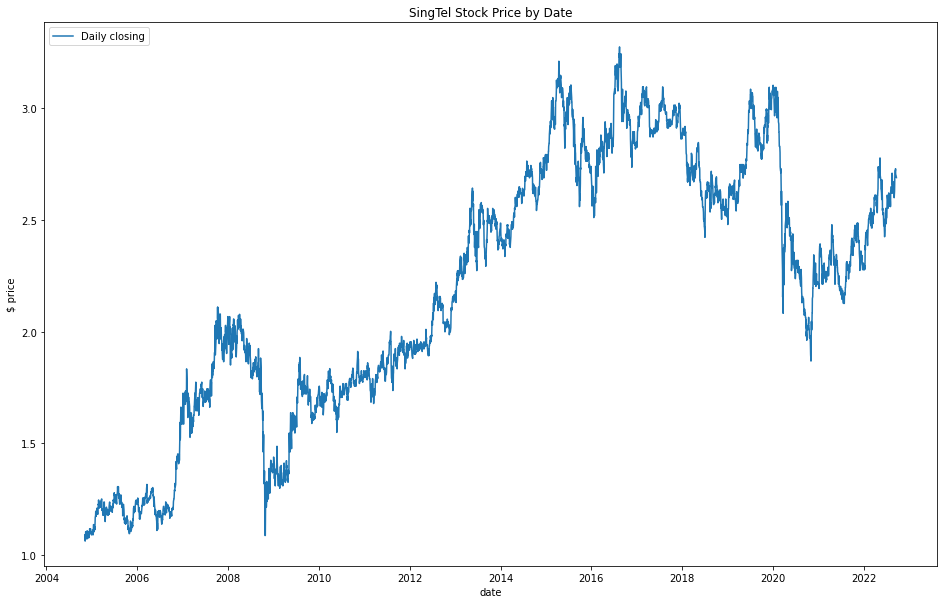

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(df_singtel_stock_market_closing_prices['Date'], df_singtel_stock_market_closing_prices['Adj Close'], label="Daily closing")

plt.xlabel("date")
plt.ylabel("$ price")
plt.title("SingTel Stock Price by Date")
plt.legend(loc="upper left")

Now let's plot this as a moving average, which is a mechanism of smoothing out the volatility of daily price changes. There are different types of moving averages but let's use the most common which is the Simple Moving Average (SMA). The SMA is simply the arithmetic mean over a specific time period.

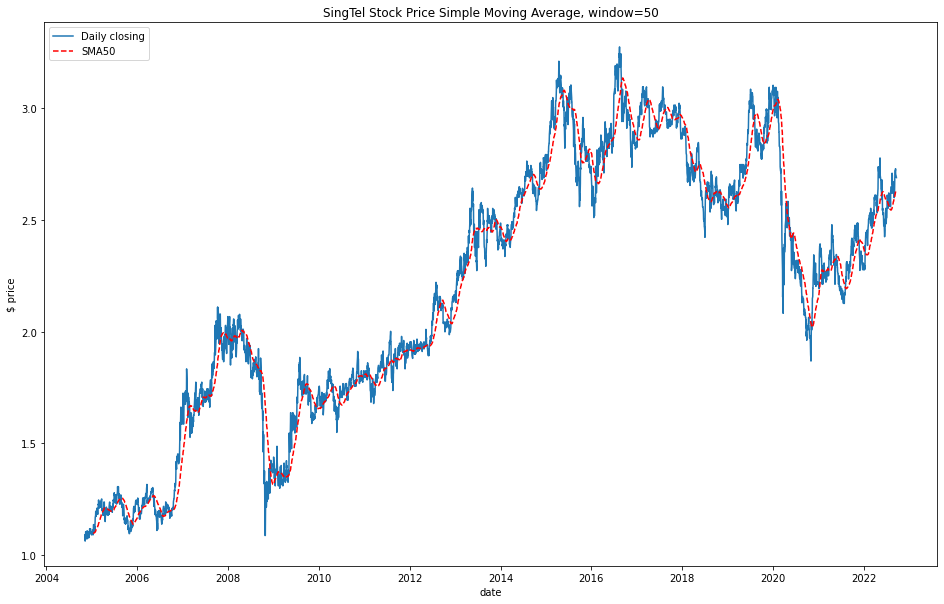

In [ ]:
df_singtel_stock_market_closing_prices["Adj Close SMA50"] = df_singtel_stock_market_closing_prices['Adj Close'].rolling(window=50).mean()

plt.figure(figsize=(16,10))
plt.plot(df_singtel_stock_market_closing_prices['Date'], df_singtel_stock_market_closing_prices['Adj Close'], label="Daily closing")
plt.plot(df_singtel_stock_market_closing_prices['Date'], df_singtel_stock_market_closing_prices['Adj Close SMA50'], 'r--', label="SMA50")

plt.xlabel("date")
plt.ylabel("$ price")
plt.title("SingTel Stock Price Simple Moving Average, window=50")
plt.legend(loc="upper left")
plt.show()

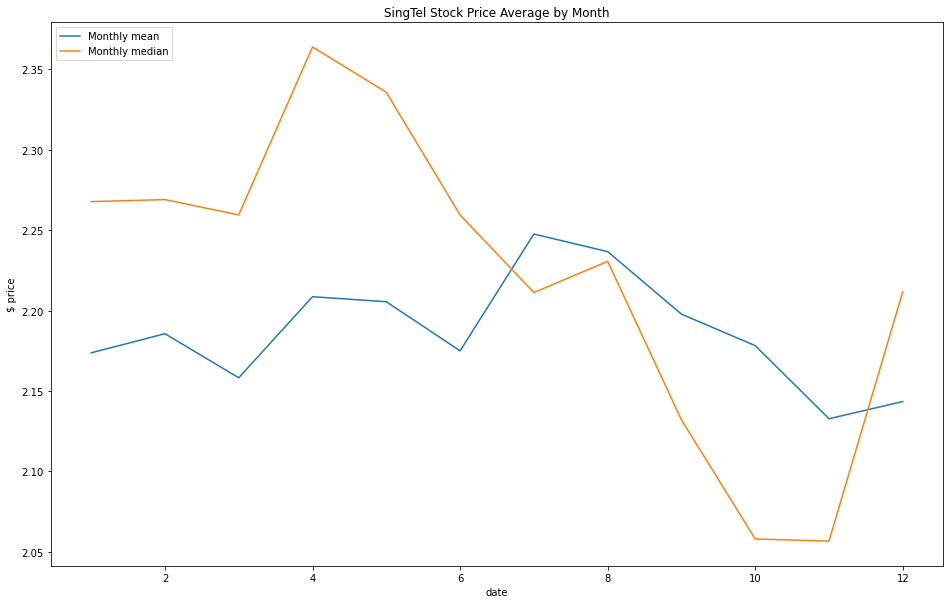

In [ ]:
# Compute the mean and median for each month
df_avg_price_mth = df_singtel_stock_market_closing_prices.groupby("Month").agg({'Adj Close': 'mean'}).reset_index()
df_avg_price_mdn = df_singtel_stock_market_closing_prices.groupby("Month").agg({'Adj Close': 'median'}).reset_index()

plt.figure(figsize=(16,10))
plt.plot(df_avg_price_mth['Month'], df_avg_price_mth['Adj Close'], label="Monthly mean")
plt.plot(df_avg_price_mdn['Month'], df_avg_price_mdn['Adj Close'], label="Monthly median")
plt.legend(loc="upper left")
plt.xlabel("date")
plt.ylabel("$ price")
plt.title("SingTel Stock Price Average by Month")

plt.show()

### Dataset 2 - The World Happiness Report

Now let's switch to a different dataset - the World Happiness Report. The World Happiness Report is a landmark survey of the state of global happiness, the latest data is from 2019 and can be downloaded from [here](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv)

#### A. Loading the data to Google Colab

We can download the dataset and upload it to our data folder as we learned in the [first section](https://colab.research.google.com/drive/19Q6GR5K_fzKpEBFVE5gMHa6aCTJ8AiNn#scrollTo=so75UC82NaIe). But do remember that, workspace will be cleaned after session is expired. 

In [ ]:
# Load the data to a dataframe
df_happiness_report = pd.read_csv('/content/data/world_happiness_report_2019.csv')

# Let's sample the data
df_happiness_report.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### B. Loading data from Google Drive


We have hosted the dataset on a Google drive, we need to complete the familiar authentication step to download this file. After executing the following code you have loaded the data file to the session.

In [ ]:
# Import libraries for reading the data file 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# This is the file ID of the hosted dataset
dataset_file_id = '1XZdPgZaJUvsoFAnsUJ7-eZR6Hly0axdg'

# Download the file from Google Drive
downloaded = drive.CreateFile({'id':dataset_file_id})
# name the downloaded file as  phidu_data.xlsx
downloaded.GetContentFile('WorldHappinessReport2019.csv')

# Read the data set to a pandas dataframe
df_happiness_report = pd.read_csv("WorldHappinessReport2019.csv")
df_happiness_report.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Visualise the distribution

Let's visualise the distribution of the happiness score.

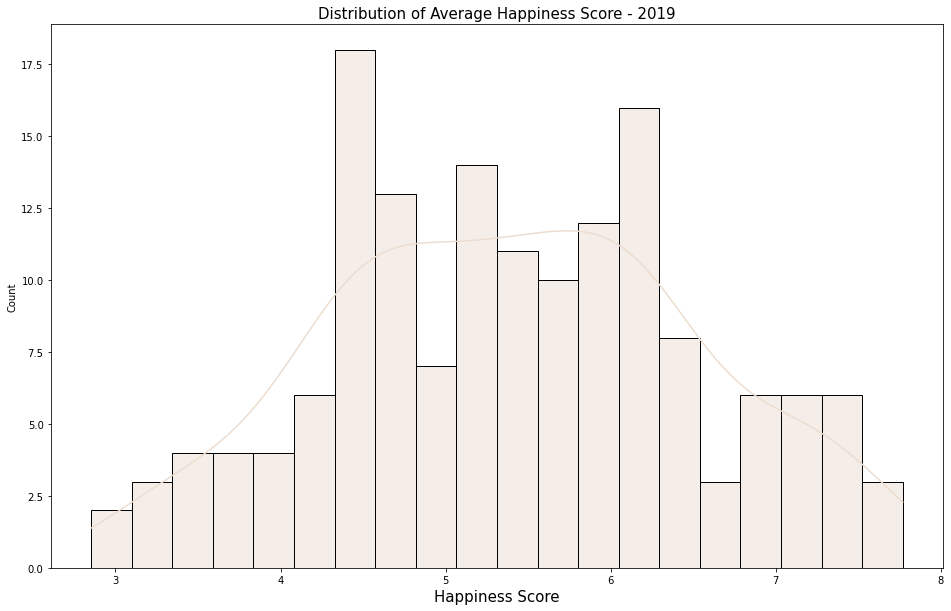

In [ ]:
# Let’s first plot the distribution of the variable happiness score. We will use the distplot function from the seaborn library.
plt.figure(figsize=(16,10))
sns.histplot(data=df_happiness_report, x="Score", bins=20, kde=True, color='#ECDDD0') 
plt.xlabel('Happiness Score', fontsize = 15)
plt.title('Distribution of Average Happiness Score - 2019', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

### Visualising the correlation

From the distribution plot it seems that the Happiness score is normally distributed. Now let us look at the correlation of the other variables with the happiness score, using a correlation matrix. 

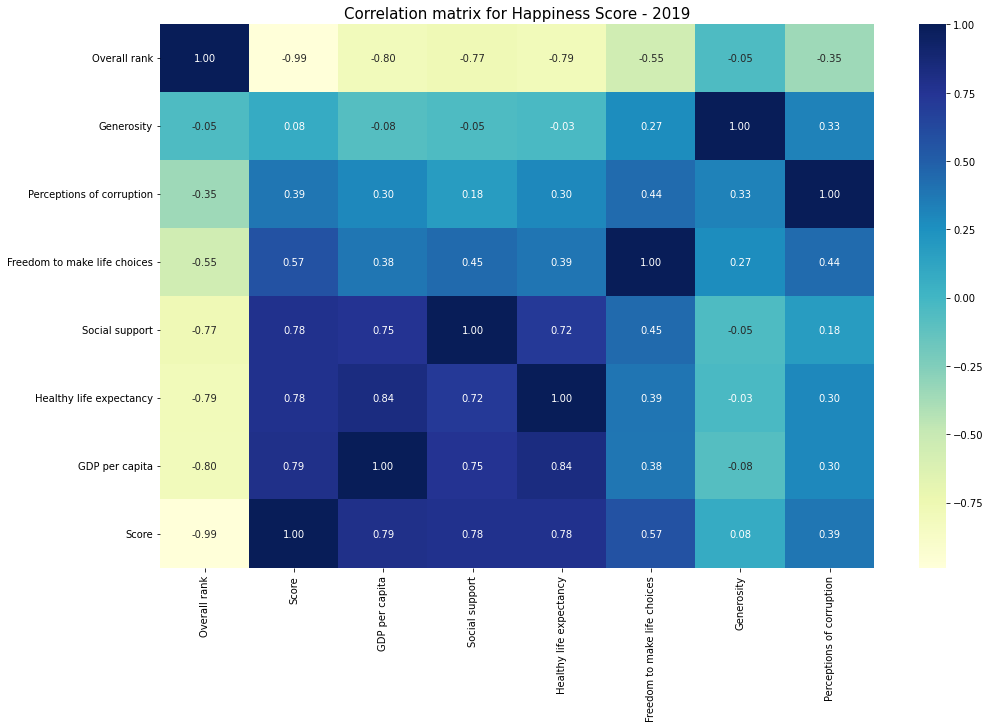

In [ ]:
corr_matrix = df_happiness_report.corr().sort_values('Score', ascending=True)

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, cmap="YlGnBu", fmt=".2f", annot=True)
plt.title('Correlation matrix for Happiness Score - 2019', fontsize = 15)
plt.show()

What can we say from the data about the factors that affect the Happiness Score assigned to a country? 

From the correlation matrix it would seem that GDP per Capita, Social Support and Healthy Lif Expectancy are positively correlated to the happiness score.

What other insights can you draw from this correlation matrix?

## SelectKBest method 

The scikit library also provides different statistical methods to filter the factors that have the most influence. One of these is the SelectKBest method which we will try next.

In [ ]:
# Let's setup our features and target
X_features=df_happiness_report.iloc[:,3:] # features: 	GDP per capita	Social support	Healthy life expectancy	Freedom to make life choices	Generosity	Perceptions of corruption
y_target=df_happiness_report.iloc[:,2] # Target: Score

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# here we call the function SelectKBest with k=3 for three top features
test = SelectKBest(score_func=f_regression, k=3)
fit = test.fit(X_features, y_target)

# summarize scores
print(fit.scores_)
features = fit.transform(X_features)
# summarize selected features
print(features[0:5,:])

[262.49764245 234.71103003 239.07546667  72.86971112   0.89050154
  26.8992564 ]
[[1.34  1.587 0.986]
 [1.383 1.573 0.996]
 [1.488 1.582 1.028]
 [1.38  1.624 1.026]
 [1.396 1.522 0.999]]


If we examine the scores given for each attribute; we can see that the first three, namely GDP per capita,	Social support,	Healthy life expectancy are chosen which bears out our inference from the correlation matrix.

Let's plot out these factors against the overall score for a final verification of our insight.

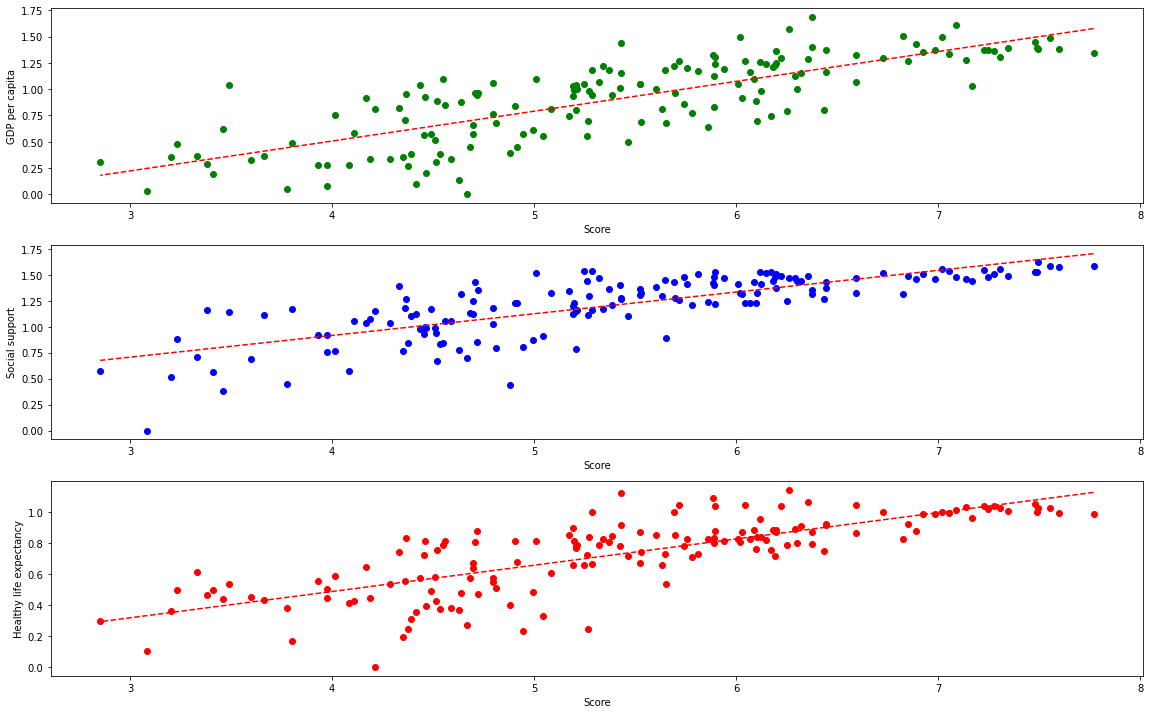

In [ ]:
plt.figure(figsize=(16,10));  # to make it easy to divide and see

plt.subplot(3,1,1);      # 1st row 
plt.scatter(df_happiness_report['Score'], df_happiness_report['GDP per capita'], color='g');
plt.xlabel("Score");
plt.ylabel("GDP per capita");
z = np.polyfit(df_happiness_report['Score'], df_happiness_report['GDP per capita'], 1)
p = np.poly1d(z)
plt.plot(df_happiness_report['Score'],p(df_happiness_report['Score']),"r--")

plt.subplot(3,1,2);     # 2nd row
plt.scatter(df_happiness_report['Score'], df_happiness_report['Social support'], color='b');
plt.xlabel("Score");
plt.ylabel("Social support");
z = np.polyfit(df_happiness_report['Score'], df_happiness_report['Social support'], 1)
p = np.poly1d(z)
plt.plot(df_happiness_report['Score'],p(df_happiness_report['Score']),"r--")

plt.subplot(3,1,3);     # 3rd row
plt.scatter(df_happiness_report['Score'], df_happiness_report['Healthy life expectancy'], color='r');
plt.xlabel("Score");
plt.ylabel("Healthy life expectancy");
z = np.polyfit(df_happiness_report['Score'], df_happiness_report['Healthy life expectancy'], 1)
p = np.poly1d(z)
plt.plot(df_happiness_report['Score'],p(df_happiness_report['Score']),"r--")

plt.tight_layout()
plt.show()

### A simple k-means clustering

Now let's attempt to cluster the records in this dataset using the k-means algorithm.


#### Identifying the optimal number of clusters using the k-means based elbow method 

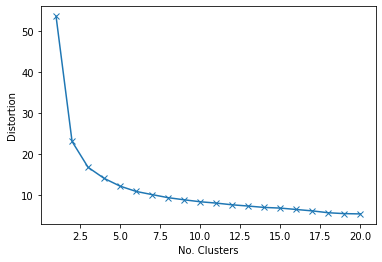

In [ ]:
# calculate distortion for 20 clusters
distortions = []
for i in range(1, 21):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=20, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_features)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 21), distortions, marker='x')
plt.xlabel('No. Clusters')
plt.ylabel('Distortion')
plt.show()

#### Normalising our country data

In [ ]:
X = df_happiness_report.drop(['Overall rank', 'Country or region'], 1)

from sklearn.preprocessing import MinMaxScaler

# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(X.values)
X = scaler.transform(X.values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


#### Clustering using K-means

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

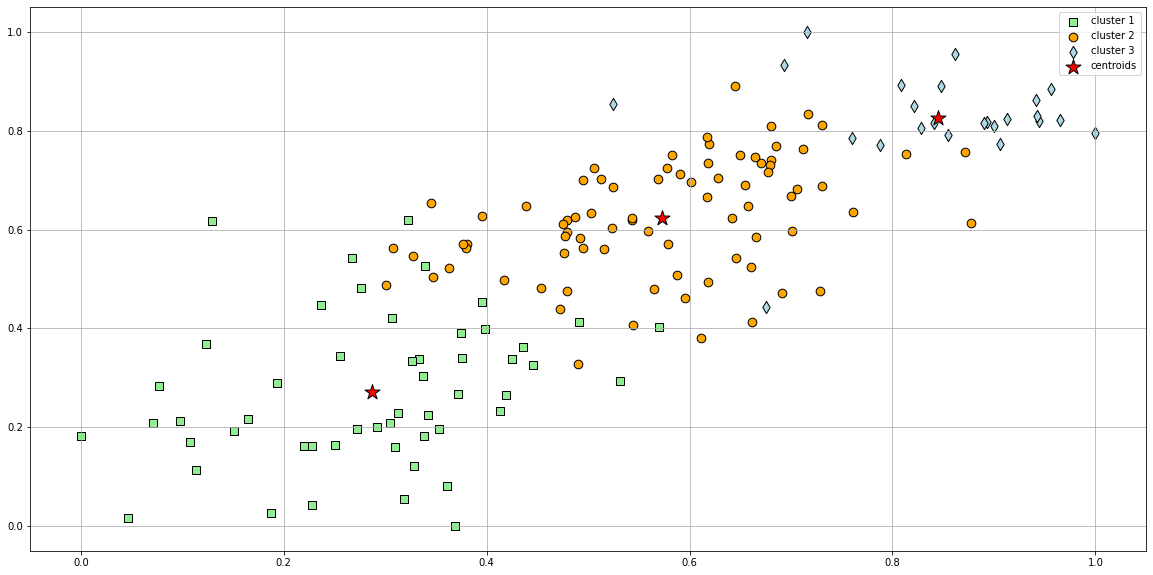

In [ ]:
# plot the 3 clusters
plt.figure(figsize=(20,10))
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=75, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=75, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=75, c='lightblue',
    marker='d', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
df_happiness_report_with_class = pd.concat([df_happiness_report, pd.Series(y_km, name="Class")], axis=1)

### Visualising the clusters on a World Map

Now that we have our clustering we are going to map them out on a world map. For this exercise we will make use of another charting library `plotly`.

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = df_happiness_report_with_class['Country or region'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df_happiness_report_with_class['Class'], 
           text = df_happiness_report_with_class['Country or region'],
           colorbar = {'title':'Class'}
            )

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'mercator'}))

choromap3 = go.Figure(data = [data], layout=layout)
choromap3.update_layout(
    autosize=False,
    width=800,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
iplot(choromap3)